In [2]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 161.3/161.3 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from openvino.runtime import Core

In [6]:
ie = Core()
model = ie.read_model(model="Models/v3-small_224_1.0_float.xml")
compiled_model = ie.compile_model(model=model, device_name="CPU")

output_layer = compiled_model.output(0)

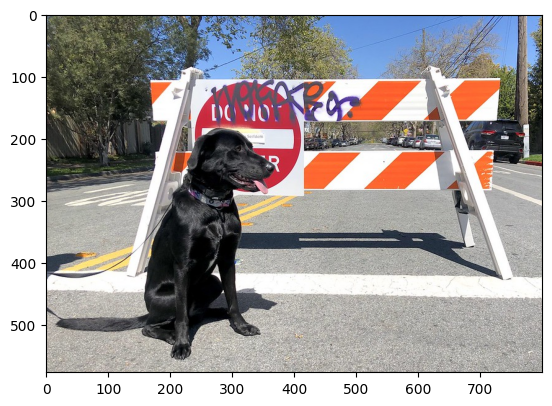

In [7]:
# The MobileNet model expects images in RGB format.
image = cv2.cvtColor(cv2.imread(filename="data/coco.jpg"), code=cv2.COLOR_BGR2RGB)

# Resize to MobileNet image shape.
input_image = cv2.resize(src=image, dsize=(224, 224))

# Reshape to model input shape.
input_image = np.expand_dims(input_image, 0)
plt.imshow(image);

In [8]:
result_infer = compiled_model([input_image])[output_layer]
result_index = np.argmax(result_infer)

In [16]:
# Convert the inference result to a class name.
imagenet_classes = open("utils/imagenet_2012.txt").read().splitlines()

# The model description states that for this model, class 0 is a background.
# Therefore, a background must be added at the beginning of imagenet_classes.
imagenet_classes = ['background'] + imagenet_classes

imagenet_classes[result_index]

'n01443537 goldfish, Carassius auratus'

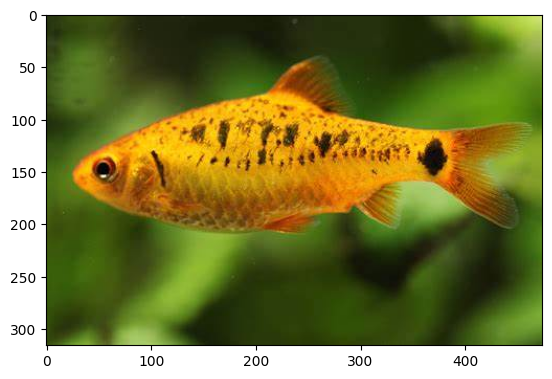

In [17]:
# The MobileNet model expects images in RGB format.
image = cv2.cvtColor(cv2.imread(filename="data/fish.jpg"), code=cv2.COLOR_BGR2RGB)

# Resize to MobileNet image shape.
input_image = cv2.resize(src=image, dsize=(224, 224))

# Reshape to model input shape.
input_image = np.expand_dims(input_image, 0)
plt.imshow(image);

In [18]:
result_infer = compiled_model([input_image])[output_layer]
result_index = np.argmax(result_infer)

In [20]:
# Convert the inference result to a class name.
imagenet_classes = open("utils/imagenet_2012.txt").read().splitlines()

# The model description states that for this model, class 0 is a background.
# Therefore, a background must be added at the beginning of imagenet_classes.
imagenet_classes = ['background'] + imagenet_classes

imagenet_classes[result_index]

'n01443537 goldfish, Carassius auratus'